In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import inventorize3 as inv  

In [4]:
df = pd.read_csv("online_retail2.csv")

In [5]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [7]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [8]:
df.duplicated().sum()

34335

In [9]:
df.dropna(inplace=True)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(797885, 8)

### Removing returned Items from analysis 

In [12]:
df = df[df["Quantity"] > 0]

In [13]:
df.shape

(779495, 8)

In [14]:
dfc = df

In [15]:
dfc

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# Preparing for ABC Analysis

### Adding a revenue column that will help in Multicriteria ABC analysis

In [16]:
dfc["Revenue"] = dfc["Price"] *dfc["Quantity"]

C:\Users\75him\AppData\Local\Temp\ipykernel_1548\432281592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc["Revenue"] = dfc["Price"] *dfc["Quantity"]


In [17]:
dfc

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


## Grouping Based on Description and calculating Aggregates for ABC analysis

In [18]:
grp = dfc.groupby(["StockCode", "Description"]).agg(Total_Sales = ("Quantity",np.sum), Total_Revenue = ("Revenue",np.sum)).reset_index()

C:\Users\75him\AppData\Local\Temp\ipykernel_1548\4133349048.py:1: FutureWarning: The provided callable <function sum at 0x0000016FA9022200> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grp = dfc.groupby(["StockCode", "Description"]).agg(Total_Sales = ("Quantity",np.sum), Total_Revenue = ("Revenue",np.sum)).reset_index()
C:\Users\75him\AppData\Local\Temp\ipykernel_1548\4133349048.py:1: FutureWarning: The provided callable <function sum at 0x0000016FA9022200> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grp = dfc.groupby(["StockCode", "Description"]).agg(Total_Sales = ("Quantity",np.sum), Total_Revenue = ("Revenue",np.sum)).reset_index()


In [19]:
grp

,StockCode,Description,Total_Sales,Total_Revenue
0,10002,INFLATABLE POLITICAL GLOBE,8479,6638.270
1,10080,GROOVY CACTUS INFLATABLE,303,124.610
2,10109,BENDY COLOUR PENCILS,4,1.680
3,10120,DOGGY RUBBER,648,136.080
4,10123C,HEARTS WRAPPING TAPE,628,226.760
...,...,...,...,...
5310,PADS,PADS TO MATCH ALL CUSHIONS,18,0.017
5311,POST,POSTAGE,5235,124648.040
5312,SP1002,KID'S CHALKBOARD/EASEL,5,14.750
5313,TEST001,This is a test product.,60,225.000


# ABC Analysis

In [20]:
abc = inv.ABC(grp[["Description","Total_Revenue"]])

In [21]:
abc

,Description,Total_Revenue,Percentage,comulative,Category
1862,REGENCY CAKESTAND 3 TIER,277656.250,1.598040e-02,0.015980,A
4751,WHITE HANGING HEART T-LIGHT HOLDER,247048.010,1.421875e-02,0.030199,A
3283,"PAPER CRAFT , LITTLE BIRDIE",168469.600,9.696201e-03,0.039895,A
5309,Manual,151777.670,8.735504e-03,0.048631,A
4725,JUMBO BAG RED RETROSPOT,134307.440,7.730012e-03,0.056361,A
...,...,...,...,...,...
4042,CAT W SUNGLASSES BLANK CARD,0.760,4.374150e-08,1.000000,C
3015,SET 12 COLOURING PENCILS DOILEY,0.650,3.741049e-08,1.000000,C
3406,PINK HEART CHRISTMAS DECORATION,0.380,2.187075e-08,1.000000,C
4040,HAPPY BIRTHDAY GINGER CAT CARD,0.380,2.187075e-08,1.000000,C


<Axes: xlabel='Category', ylabel='count'>

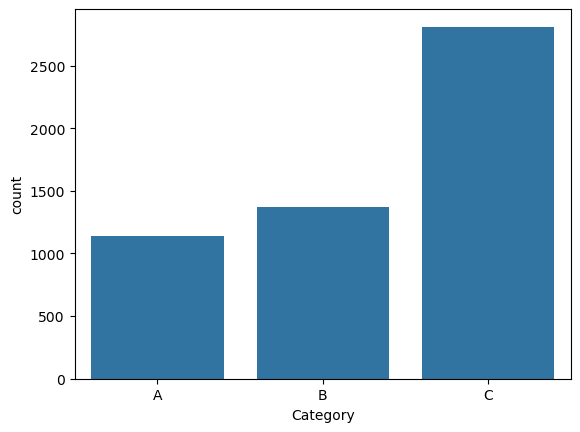

In [22]:
sns.countplot(x="Category", data = abc)

<Axes: xlabel='Category', ylabel='Total_Revenue'>

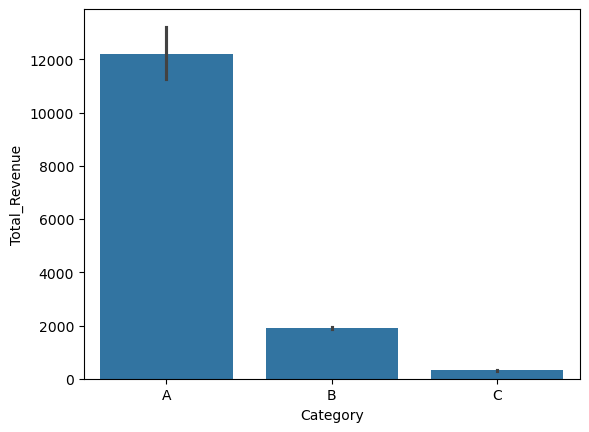

In [23]:
sns.barplot(x="Category", y="Total_Revenue", data = abc)

# Multi-Criteria ABC Analysis

In [24]:
mabc = inv.productmix(grp["Description"],grp["Total_Sales"], grp["Total_Revenue"])

In [25]:
mabc

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
1862,REGENCY CAKESTAND 3 TIER,24139,277656.250,2.292685e-03,0.177816,1.598040e-02,0.015980,A,A,A_A
4751,WHITE HANGING HEART T-LIGHT HOLDER,91757,247048.010,8.714937e-03,0.018705,1.421875e-02,0.030199,A,A,A_A
3283,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.600,7.692779e-03,0.026398,9.696201e-03,0.039895,A,A,A_A
5309,Manual,9391,151777.670,8.919426e-04,0.423176,8.735504e-03,0.048631,A,A,A_A
4725,JUMBO BAG RED RETROSPOT,74224,134307.440,7.049680e-03,0.048279,7.730012e-03,0.056361,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...
4042,CAT W SUNGLASSES BLANK CARD,4,0.760,3.799138e-07,0.999969,4.374150e-08,1.000000,C,C,C_C
3015,SET 12 COLOURING PENCILS DOILEY,1,0.650,9.497844e-08,0.999994,3.741049e-08,1.000000,C,C,C_C
3406,PINK HEART CHRISTMAS DECORATION,1,0.380,9.497844e-08,0.999995,2.187075e-08,1.000000,C,C,C_C
4040,HAPPY BIRTHDAY GINGER CAT CARD,2,0.380,1.899569e-07,0.999988,2.187075e-08,1.000000,C,C,C_C


<Axes: xlabel='product_mix', ylabel='count'>

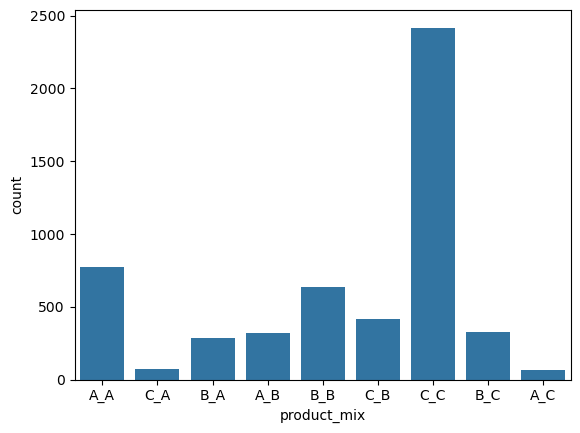

In [26]:
sns.countplot(x = "product_mix", data = mabc)

<Axes: xlabel='product_mix', ylabel='revenue'>

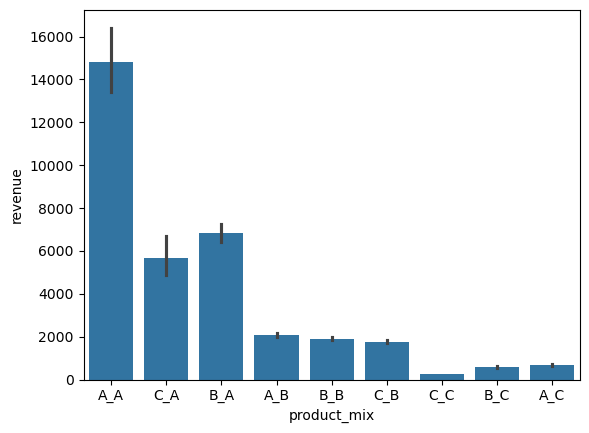

In [27]:
sns.barplot(x="product_mix", y="revenue", data =mabc)

<Axes: xlabel='product_mix', ylabel='sales'>

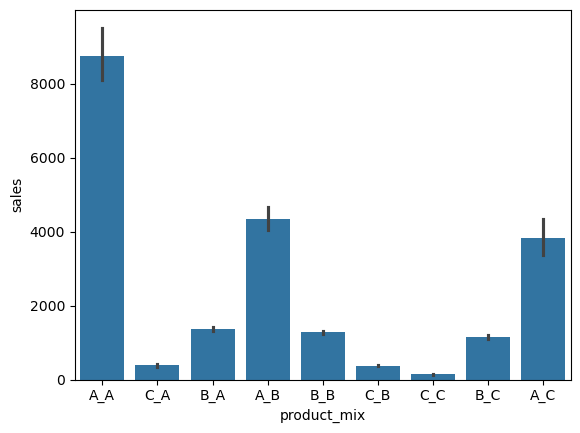

In [28]:
sns.barplot(x="product_mix", y="sales", data =mabc)

# Country/Store/Region based multi-criteria ABC segmentation

## Prepare Data for ABC analysis

In [29]:
dfc.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')

### as we group by both country, description - we get grouped descriptions within each country, the whole country column dosen't get grouped completely

In [30]:
cgrp = dfc.groupby(["Country", "Description"]).agg(Total_Sales = ("Quantity", np.sum), Total_Revenue = ("Revenue", np.sum)).reset_index()

C:\Users\75him\AppData\Local\Temp\ipykernel_1548\1821297479.py:1: FutureWarning: The provided callable <function sum at 0x0000016FA9022200> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cgrp = dfc.groupby(["Country", "Description"]).agg(Total_Sales = ("Quantity", np.sum), Total_Revenue = ("Revenue", np.sum)).reset_index()
C:\Users\75him\AppData\Local\Temp\ipykernel_1548\1821297479.py:1: FutureWarning: The provided callable <function sum at 0x0000016FA9022200> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cgrp = dfc.groupby(["Country", "Description"]).agg(Total_Sales = ("Quantity", np.sum), Total_Revenue = ("Revenue", np.sum)).reset_index()


In [31]:
cgrp.head()

,Country,Description,Total_Sales,Total_Revenue
0,Australia,DOLLY GIRL BEAKER,200,216.0
1,Australia,I LOVE LONDON MINI BACKPACK,4,16.6
2,Australia,10 COLOUR SPACEBOY PEN,48,40.8
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384,211.2
4,Australia,12 PENCILS SMALL TUBE RED SPOTTY,24,15.6


## Multi-criteria ABC analysis

In [32]:
c_mabc = inv.productmix_storelevel(cgrp["Description"], cgrp["Total_Sales"],cgrp["Total_Revenue"],cgrp["Country"])

C:\Users\75him\anaconda3\Lib\site-packages\inventorize3\__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])
C:\Users\75him\anaconda3\Lib\site-packages\inventorize3\__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])
C:\Users\75him\anaconda3\Lib\site-packages\inventorize3\__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [33]:
abc_australia = c_mabc[c_mabc["storeofsku"] == "Australia"]

In [34]:
abc_australia

,sku,sales,revenue,storeofsku,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
527,RABBIT NIGHT LIGHT,1884,3375.84,Australia,0.018104,0.047508,0.019942,0.019942,A,A,A_A
573,REGENCY CAKESTAND 3 TIER,266,2930.70,Australia,0.002556,0.507077,0.017312,0.037254,A,A,A_A
570,RED TOADSTOOL LED NIGHT LIGHT,1668,2464.20,Australia,0.016028,0.080141,0.014557,0.051811,A,A,A_A
180,DOLLY GIRL LUNCH BOX,1316,2182.20,Australia,0.012646,0.105932,0.012891,0.064702,A,A,A_A
671,SET OF 6 SPICE TINS PANTRY DESIGN,600,2082.00,Australia,0.005766,0.222097,0.012299,0.077001,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...,...
256,GIN & TONIC DIET GREETING CARD,12,5.04,Australia,0.000115,0.991842,0.000030,0.999905,C,C,C_C
598,ROBOT BIRTHDAY CARD,12,5.04,Australia,0.000115,0.986999,0.000030,0.999935,C,C,C_C
50,BANQUET BIRTHDAY CARD,12,5.04,Australia,0.000115,0.982848,0.000030,0.999965,C,C,C_C
470,PASTEL COLOUR HONEYCOMB FAN,12,4.68,Australia,0.000115,0.989997,0.000028,0.999993,C,C,C_C


<Axes: xlabel='product_mix', ylabel='count'>

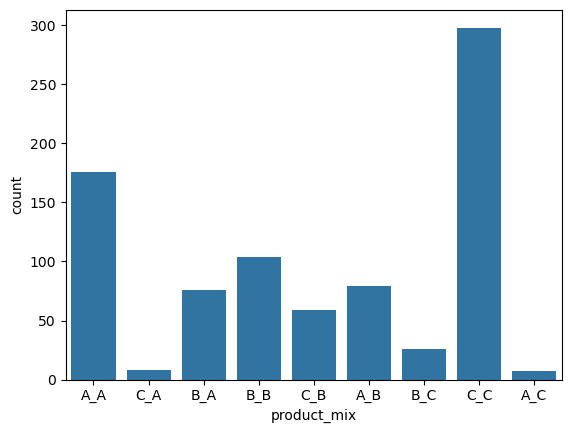

In [35]:
sns.countplot(x="product_mix", data = abc_australia)

<Axes: xlabel='product_mix', ylabel='revenue'>

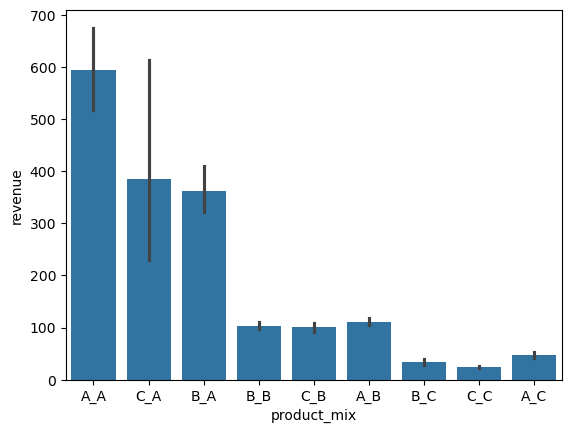

In [36]:
sns.barplot(x= "product_mix", y="revenue", data = abc_australia)

<Axes: xlabel='product_mix', ylabel='sales'>

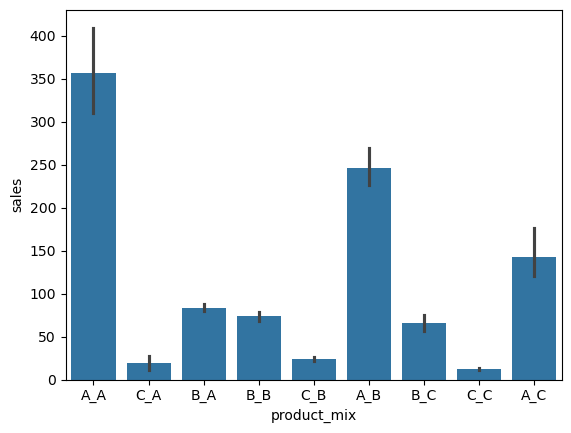

In [37]:
sns.barplot(x= "product_mix", y="sales", data = abc_australia)

# 

# ---------------------------------------------------------------------------------------

# DEMAND CLASSIFICATION

In [39]:
retail = dfc.copy()

In [40]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [43]:
retail["InvoiceDate"] = pd.to_datetime(retail["InvoiceDate"])

## Invoice Date is in DateTime, We just need date

In [49]:
retail["Date"] = retail["InvoiceDate"].dt.date

In [44]:
retail["DayOfWeek"] = retail["InvoiceDate"].dt.dayofweek

### Checking for holiday

In [53]:
retail["DayOfWeek"].value_counts()

DayOfWeek
3    156012
1    134028
2    130782
6    130141
0    124957
4    103175
5       400
Name: count, dtype: int64

### 5th date has very less sales, we can ignore it as it seems like it had special deliveries only on that date

In [55]:
retail_working_days = retail[retail["DayOfWeek"] != 5]

### Calculating CV(coefficient of variation for quantity) and ADI(average demand interval for time)

In [64]:
data_ = retail_working_days.groupby(["Description", "Date"]).agg(TotalSales = ("Quantity",np.sum)).reset_index()

C:\Users\75him\AppData\Local\Temp\ipykernel_1548\256352154.py:1: FutureWarning: The provided callable <function sum at 0x0000016FA9022200> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_ = retail_working_days.groupby(["Description", "Date"]).agg(TotalSales = ("Quantity",np.sum)).reset_index()


In [67]:
data_

,Description,Date,TotalSales
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,12
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,3
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,15
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1
...,...,...,...
440157,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-18,5
440158,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-23,2
440159,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-24,1
440160,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-30,1


In [65]:
cv = data_.groupby("Description").agg(AvgSales = ("TotalSales", np.mean), StandardDeviation = ("TotalSales", np.std)).reset_index()

C:\Users\75him\AppData\Local\Temp\ipykernel_1548\3412942789.py:1: FutureWarning: The provided callable <function mean at 0x0000016FA90232E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  cv = data_.groupby("Description").agg(AvgSales = ("TotalSales", np.mean), StandardDeviation = ("TotalSales", np.std)).reset_index()
C:\Users\75him\AppData\Local\Temp\ipykernel_1548\3412942789.py:1: FutureWarning: The provided callable <function std at 0x0000016FA9023420> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  cv = data_.groupby("Description").agg(AvgSales = ("TotalSales", np.mean), StandardDeviation = ("TotalSales", np.std)).reset_index()


In [128]:
cv["CV_Squared"] = (cv["StandardDeviation"]/ cv["AvgSales"])**2

In [129]:
cv

,Description,AvgSales,StandardDeviation,CV_Squared
0,DOORMAT UNION JACK GUNS AND ROSES,6.958333,7.865606,1.277774
1,3 STRIPEY MICE FELTCRAFT,11.220339,14.247889,1.612460
2,4 PURPLE FLOCK DINNER CANDLES,7.363636,10.850123,2.171124
3,50'S CHRISTMAS GIFT BAG LARGE,31.416667,55.502112,3.121036
4,ANIMAL STICKERS,32.083333,11.758620,0.134324
...,...,...,...,...
5277,ZINC T-LIGHT HOLDER STARS SMALL,36.522388,46.825017,1.643757
5278,ZINC TOP 2 DOOR WOODEN SHELF,5.902439,7.598700,1.657355
5279,ZINC WILLIE WINKIE CANDLE STICK,21.106529,23.477627,1.237299
5280,ZINC WIRE KITCHEN ORGANISER,2.500000,2.505549,1.004444


## ADI (calculte days b/w consecutive sales to get -> no sales dates and avg that to get ADI)

In [101]:
skus = data_.Description.unique()

In [102]:
empty_df = pd.DataFrame()

In [107]:
for sku in skus:
    a = data_[data_["Description"] == sku]
    a["PreviousDate"] = a["Date"].shift(1)
    empty_df = pd.concat([empty_df,a])

C:\Users\75him\AppData\Local\Temp\ipykernel_1548\1226473350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["PreviousDate"] = a["Date"].shift(1)


In [113]:
empty_df["NoSalesDuration"] = empty_df["Date"] - empty_df["PreviousDate"]

In [114]:
empty_df['NoSalesDuration'] = pd.to_timedelta(empty_df['NoSalesDuration'], errors='coerce').dt.days

In [115]:
empty_df

,Description,Date,TotalSales,PreviousDate,NoSalesDuration
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1,None,NaN
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,12,2010-01-05,3.0
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,3,2010-01-08,2.0
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,15,2010-01-10,1.0
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1,2010-01-11,1.0
...,...,...,...,...,...
440157,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-18,5,2011-10-27,22.0
440158,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-23,2,2011-11-18,5.0
440159,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-24,1,2011-11-23,1.0
440160,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-30,1,2011-11-24,6.0


In [117]:
adi = empty_df.groupby(["Description"]).agg(ADI = ("NoSalesDuration","mean")).reset_index()

In [118]:
adi

,Description,ADI
0,DOORMAT UNION JACK GUNS AND ROSES,3.695652
1,3 STRIPEY MICE FELTCRAFT,3.741379
2,4 PURPLE FLOCK DINNER CANDLES,10.511628
3,50'S CHRISTMAS GIFT BAG LARGE,1.847458
4,ANIMAL STICKERS,8.272727
...,...,...
5277,ZINC T-LIGHT HOLDER STARS SMALL,1.736842
5278,ZINC TOP 2 DOOR WOODEN SHELF,17.550000
5279,ZINC WILLIE WINKIE CANDLE STICK,2.544828
5280,ZINC WIRE KITCHEN ORGANISER,24.333333


In [130]:
adi_cv = pd.merge(adi, cv)

In [132]:
adi_cv

,Description,ADI,AvgSales,StandardDeviation,CV_Squared
0,DOORMAT UNION JACK GUNS AND ROSES,3.695652,6.958333,7.865606,1.277774
1,3 STRIPEY MICE FELTCRAFT,3.741379,11.220339,14.247889,1.612460
2,4 PURPLE FLOCK DINNER CANDLES,10.511628,7.363636,10.850123,2.171124
3,50'S CHRISTMAS GIFT BAG LARGE,1.847458,31.416667,55.502112,3.121036
4,ANIMAL STICKERS,8.272727,32.083333,11.758620,0.134324
...,...,...,...,...,...
5277,ZINC T-LIGHT HOLDER STARS SMALL,1.736842,36.522388,46.825017,1.643757
5278,ZINC TOP 2 DOOR WOODEN SHELF,17.550000,5.902439,7.598700,1.657355
5279,ZINC WILLIE WINKIE CANDLE STICK,2.544828,21.106529,23.477627,1.237299
5280,ZINC WIRE KITCHEN ORGANISER,24.333333,2.500000,2.505549,1.004444


In [137]:
def classify_demand(row):
    if row['ADI'] < 1.34 and row['CV_Squared'] < 0.49:
        return 'Smooth'
    elif row['ADI'] >= 1.34 and row['CV_Squared'] >= 0.49:
        return 'Lumpy'
    elif row['ADI'] < 1.34 and row['CV_Squared'] >= 0.49:
        return 'Erratic'
    elif row['ADI'] >= 1.34 and row['CV_Squared'] < 0.49:
        return 'Intermittent'
    else:
        return 'Unclassified'

In [138]:
adi_cv['Demand_Category'] = adi_cv.apply(classify_demand, axis=1)

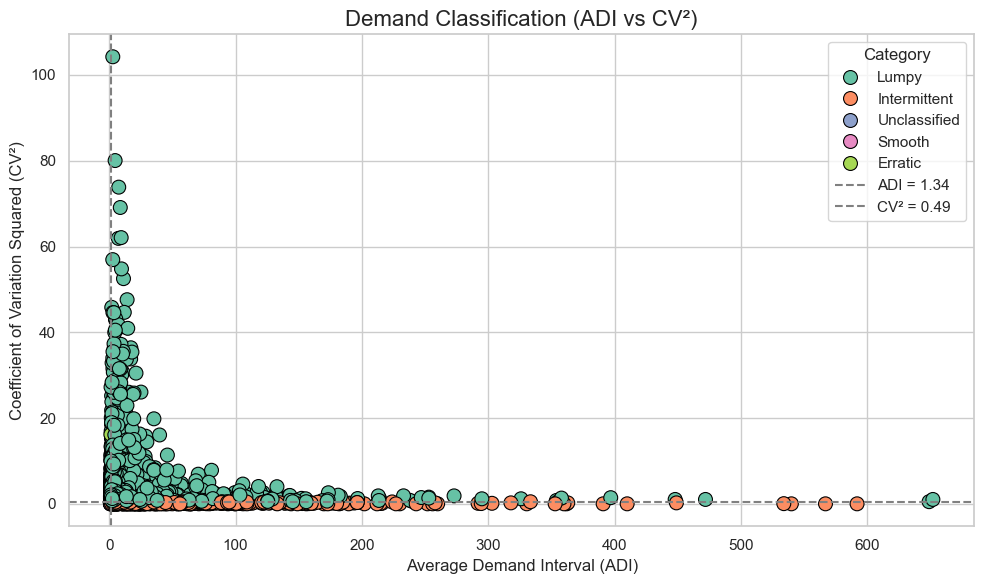

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=adi_cv,
    x='ADI',
    y='CV_Squared',
    hue='Demand_Category',
    palette='Set2',
    s=100,
    edgecolor='black'
)

# Reference lines for category thresholds
plt.axvline(1.34, color='gray', linestyle='--', label='ADI = 1.34')
plt.axhline(0.49, color='gray', linestyle='--', label='CV² = 0.49')

# Labels and title
plt.title("Demand Classification (ADI vs CV²)", fontsize=16)
plt.xlabel("Average Demand Interval (ADI)")
plt.ylabel("Coefficient of Variation Squared (CV²)")
plt.legend(title='Category')
plt.tight_layout()

plt.show()

In [146]:
category_count = adi_cv.groupby("Demand_Category").agg(TotalCount = ("Demand_Category","count")).reset_index()

In [1]:
category_count

NameError: name 'category_count' is not defined

# -------------------------------------------------------------------------------------

# Safety Stock